In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import stats as st

In [2]:
!ls /datasets/megaline*

/datasets/megaline_calls.csv	 /datasets/megaline_tariffs.csv
/datasets/megaline_internet.csv  /datasets/megaline_users.csv
/datasets/megaline_messages.csv


In [3]:
users = pd.read_csv('/datasets/megaline_users.csv')
users.head()

,user_id,first_name,last_name,age,city,reg_date,tariff,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN


In [4]:
users.shape

(500, 8)

In [5]:
calls = pd.read_csv('/datasets/megaline_calls.csv')
print(calls.head())
calls.shape

         id  user_id   call_date  duration
0   1000_93     1000  2018-12-27      8.52
1  1000_145     1000  2018-12-27     13.66
2  1000_247     1000  2018-12-27     14.48
3  1000_309     1000  2018-12-28      5.76
4  1000_380     1000  2018-12-30      4.22


(137735, 4)

In [6]:
internet = pd.read_csv('/datasets/megaline_internet.csv')
print(internet.head())
internet.shape

         id  user_id session_date  mb_used
0   1000_13     1000   2018-12-29    89.86
1  1000_204     1000   2018-12-31     0.00
2  1000_379     1000   2018-12-28   660.40
3  1000_413     1000   2018-12-26   270.99
4  1000_442     1000   2018-12-27   880.22


(104825, 4)

In [7]:
messages = pd.read_csv('/datasets/megaline_messages.csv')
print(messages.head())
messages.shape

         id  user_id message_date
0  1000_125     1000   2018-12-27
1  1000_160     1000   2018-12-31
2  1000_223     1000   2018-12-31
3  1000_251     1000   2018-12-27
4  1000_255     1000   2018-12-26


(76051, 3)

In [8]:
tariffs = pd.read_csv('/datasets/megaline_tariffs.csv')
print(tariffs.head())

   messages_included  mb_per_month_included  minutes_included  \
0                 50                  15360               500   
1               1000                  30720              3000   

   usd_monthly_pay  usd_per_gb  usd_per_message  usd_per_minute tariff_name  
0               20          10             0.03            0.03        surf  
1               70           7             0.01            0.01    ultimate  


## Data Preprocessing

In [9]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
first_name    500 non-null object
last_name     500 non-null object
age           500 non-null int64
city          500 non-null object
reg_date      500 non-null object
tariff        500 non-null object
churn_date    34 non-null object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [10]:
users[~users['churn_date'].isna()].head()

,user_id,first_name,last_name,age,city,reg_date,tariff,churn_date
6,1006,Jesusa,Bradford,73,"San Francisco-Oakland-Berkeley, CA MSA",2018-11-27,ultimate,2018-12-18
12,1012,Jonelle,Mcbride,59,"Chicago-Naperville-Elgin, IL-IN-WI MSA",2018-06-28,surf,2018-11-16
22,1022,Bo,Snow,73,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-04-20,surf,2018-09-07
40,1040,Paris,Santos,72,"Philadelphia-Camden-Wilmington, PA-NJ-DE-MD MSA",2018-12-23,surf,2018-12-30
50,1050,Jone,Owen,23,"Miami-Fort Lauderdale-West Palm Beach, FL MSA",2018-03-20,ultimate,2018-10-07


In [11]:
type(users.loc[6,'churn_date'])

str

It is tempting to remove users who quit before the year end due to the different factors. For example was their pattern of activity the reason for quitting the tariff? May we consider them as valid customer for sampling in this case? <br><br>
But not to cut our data too hard at the very beginning we'll keep it for now and fill the missing values with the first day of 2019

In [12]:
users['churn_date'].fillna('2019-01-01', inplace=True)
users.isna().any()

user_id       False
first_name    False
last_name     False
age           False
city          False
reg_date      False
tariff        False
churn_date    False
dtype: bool

In [13]:
users['reg_date'].str.contains('2018').sum()

500

In [14]:
users['tariff'].unique()

array(['ultimate', 'surf'], dtype=object)

In [15]:
users['reg_date'] = pd.to_datetime(users['reg_date'])
users['churn_date'] = pd.to_datetime(users['churn_date'])

/opt/conda/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


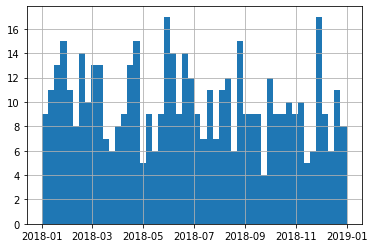

In [16]:
users['reg_date'].hist(bins=50)
plt.show()

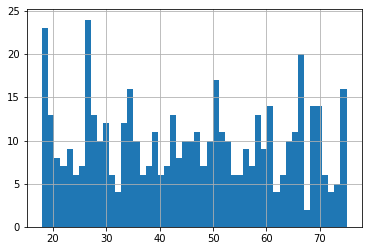

In [17]:
users['age'].hist(bins=50)
plt.show()

In [18]:
len(users['user_id'].unique())

500

users looks good now

In [19]:
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
id           137735 non-null object
user_id      137735 non-null int64
call_date    137735 non-null object
duration     137735 non-null float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


In [20]:
calls['call_date'] = pd.to_datetime(calls['call_date'])

In [21]:
len(calls['id'].unique())

137735

In [22]:
len(calls['user_id'].unique())

481

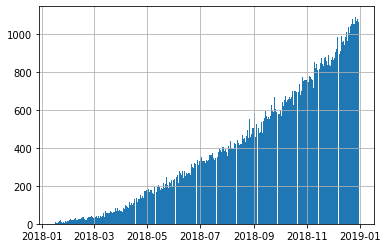

In [23]:
calls['call_date'].hist(bins=365)
plt.show()

looks good - more users signed up more calls made

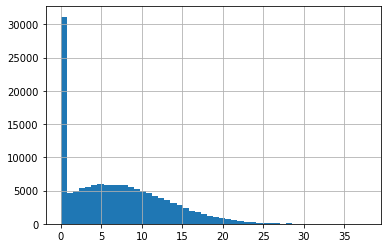

In [24]:
calls['duration'].hist(bins=50)
plt.show()

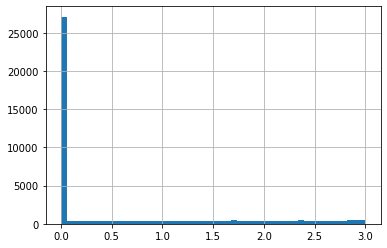

In [25]:
calls['duration'].hist(bins=50, range=(0,3))
plt.show()

too much calls with duration equals to 0

In [26]:
calls[calls['duration'] == 0].shape

(26834, 4)

In [27]:
zero_calls = calls.query('duration == 0')
zero_calls.head()

,id,user_id,call_date,duration
19,1001_4,1001,2018-12-05,0.0
25,1001_13,1001,2018-12-24,0.0
31,1001_30,1001,2018-10-17,0.0
32,1001_31,1001,2018-11-03,0.0
34,1001_35,1001,2018-12-21,0.0


In [28]:
len(zero_calls['user_id'].unique())

478

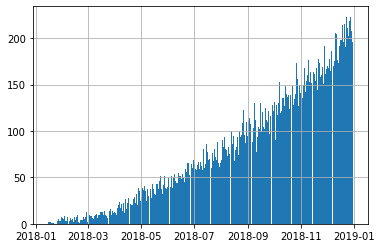

In [29]:
zero_calls['call_date'].hist(bins=365)

In [30]:
zero_calls.groupby('user_id')['duration'].count().describe()

count    478.000000
mean      56.138075
std       46.988310
min        1.000000
25%       20.000000
50%       42.000000
75%       82.000000
max      249.000000
Name: duration, dtype: float64

In [31]:
calls.query('duration > 0')['duration'].describe()

count    110901.000000
mean          8.378196
std           5.354567
min           0.010000
25%           4.150000
50%           7.710000
75%          11.820000
max          37.600000
Name: duration, dtype: float64

Well there is a problem with the data of durations of the calls. While the whole data set has a nice Poisson-like shape we have the unfitting spike in 0.0 time duration. It stands for 26834 calls and well spread among users and time interval. In other words almost 20% of the calls data has zero time of the call. <br><br>
First of all this is crucial part of information for analizing tariffs because they have minutes per month included in the monthly payment and obviously if those zeros are errors and 20 percent of the calls data was corrupted with 0 in place of valid positive timing we can hardly expect any meaningfull conclusions without understanding the reason of the corruption.
<br><br>
Thus we should reach the data provider for explanations of these zeros before jumping to any conclusions.
<br><br>
While we are waiting for clarification we'll try to guess:
1. It is not very likely that the state mobile operator could be so careless and provided the research department with the data with so high percentage of errors in the crucial for analysis factor. That's why we tend to think that those zeros was actually used for computation of the final bills the clients got from the company. In this case the zeros could stand for 'missed calls' - the connection was made but there was no answer or busy line and there wasn't a conversation at all. Make sense - the call was made but it wasn't counted for tarification. However we shouldn't get the data of this calls here in the research department but at least it's an explanation. In this case we should proceed without any modification to the duration column.
2. Any other explanation looks much less likely. But taking into account that this is the training project and we were specifically hinted that the zero values are mistakes and should be preprocessed... Well let's add an extra column: 'duration_processed' and fill the zeroes in it with mean duration value per user (no extra long calls there - 37 minutes maximum looks too small for real life data actually, that's why we are using mean and not median). Keep both column for later use and we'll see if it make any difference for overall conclusion

In [32]:
mean_duration = calls.query('duration > 0')['duration'].mean()
duration_dict = (
    calls.query('duration > 0')
    .groupby('user_id')['duration']
    .mean()
    .fillna(mean_duration)
    .to_dict()
)

In [33]:
len(duration_dict)

481

In [34]:
def fill_duration(row):
    if row['duration'] == 0.0:
        if row['user_id'] in duration_dict.keys():
            return duration_dict[row['user_id']]
        else:
            print ('Not in dict', row['user_id'])
            return mean_duration
    return row['duration']

calls['duration_adjusted'] = calls.apply(fill_duration, axis=1)
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 5 columns):
id                   137735 non-null object
user_id              137735 non-null int64
call_date            137735 non-null datetime64[ns]
duration             137735 non-null float64
duration_adjusted    137735 non-null float64
dtypes: datetime64[ns](1), float64(2), int64(1), object(1)
memory usage: 5.3+ MB


In [35]:
calls.query('duration == 0').tail()

,id,user_id,call_date,duration,duration_adjusted
137714,1499_183,1499,2018-11-10,0.0,8.481345
137715,1499_184,1499,2018-09-15,0.0,8.481345
137720,1499_189,1499,2018-12-27,0.0,8.481345
137722,1499_191,1499,2018-12-24,0.0,8.481345
137725,1499_194,1499,2018-10-31,0.0,8.481345


In [36]:
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
id              104825 non-null object
user_id         104825 non-null int64
session_date    104825 non-null object
mb_used         104825 non-null float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


In [37]:
internet.head()

,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86
1,1000_204,1000,2018-12-31,0.00
2,1000_379,1000,2018-12-28,660.40
3,1000_413,1000,2018-12-26,270.99
4,1000_442,1000,2018-12-27,880.22


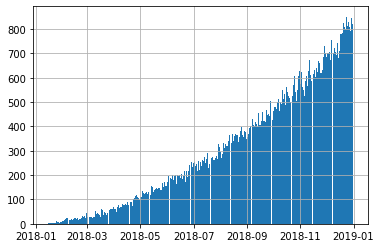

In [38]:
internet['session_date'] = pd.to_datetime(internet['session_date'])
internet['session_date'].hist(bins=365)
plt.show()

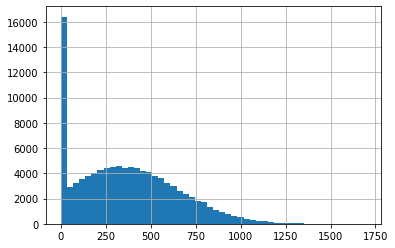

In [39]:
internet['mb_used'].hist(bins=50)
plt.show()

In [40]:
internet.query('mb_used == 0.0').shape[0]

13747

Here we go again - more then 10% of registered internet sessions have zero megabyte used. With absolutely the same reasoning as with zero time calls we proceed with
1. We need to check the meaning of these zero-mb internet connects with data set provider
2. We suggest that most likely those zeros stands for ultra short connections (most likely automatic ones) and in this case we keep it in the data set as it is without correction. But to be on the safe side and in case we've got a feedback from the source confirming the data as errors we'll add the extra column with zeros replaced with means (no outliers on histogram again) by users. And analyse it's impact on our tariff analisis later. 

In [41]:
mean_mb = internet.query('mb_used > 0')['mb_used'].mean()
mb_used_dict = (
    internet.query('mb_used > 0')
    .groupby('user_id')['mb_used']
    .mean()
    .fillna(mean_mb)
    .to_dict()
)

In [42]:
def fill_mb_used(row):
    if row['mb_used'] == 0.0:
        if row['user_id'] in mb_used_dict.keys():
            return mb_used_dict[row['user_id']]
        else:
            print ('Not in dict', row['user_id'])
            return mean_mb
    return row['mb_used']

internet['mb_used_adjusted'] = internet.apply(fill_mb_used, axis=1)
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 5 columns):
id                  104825 non-null object
user_id             104825 non-null int64
session_date        104825 non-null datetime64[ns]
mb_used             104825 non-null float64
mb_used_adjusted    104825 non-null float64
dtypes: datetime64[ns](1), float64(2), int64(1), object(1)
memory usage: 4.0+ MB


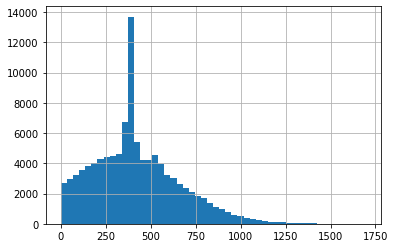

In [43]:
internet['mb_used_adjusted'].hist(bins=50)
plt.show()

ugly spike around the mean...

In [44]:
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
id              76051 non-null object
user_id         76051 non-null int64
message_date    76051 non-null object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


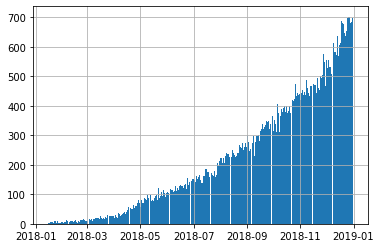

In [45]:
messages['message_date'] = pd.to_datetime(messages['message_date'])
messages['message_date'].hist(bins=365)
plt.show()

looks good with messages

In [46]:
tariffs

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,tariff_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


In [47]:
tariffs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
messages_included        2 non-null int64
mb_per_month_included    2 non-null int64
minutes_included         2 non-null int64
usd_monthly_pay          2 non-null int64
usd_per_gb               2 non-null int64
usd_per_message          2 non-null float64
usd_per_minute           2 non-null float64
tariff_name              2 non-null object
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes


looks good for tariffs too.

### Conclusion

The data sets we were provided this time turn out to be of rather high quality. Overall we detected only one type of possible error - too many zero time calls and zero traffic internet sessions.<br><br>
We have reasons to think these are valid data too, but to be on the safe side we created additional columns 'calls_adjusted' and 'mb_used_adjusted' and filled it with average per user length/size.<br><br>
Thus we are going to analyse both cases later on but the best way to deal with the problem is to inquire the source of the data sets.

## Aggregate data.

Our task is to analyse two prepaid tariff plans. Both have a monthly tarification. It's not clear how exactly payment's periods are calculated but anyway we won't be wrong if collect the data per full calendar months. This way it guarantee to represent every part of payment period (it's importent because the clients behavier could differ in the start of period and at the end of it)

In [48]:
calls_stat = calls.merge(users, on='user_id', how='left')
calls_stat.head()

,id,user_id,call_date,duration,duration_adjusted,first_name,last_name,age,city,reg_date,tariff,churn_date
0,1000_93,1000,2018-12-27,8.52,8.52,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,2019-01-01
1,1000_145,1000,2018-12-27,13.66,13.66,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,2019-01-01
2,1000_247,1000,2018-12-27,14.48,14.48,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,2019-01-01
3,1000_309,1000,2018-12-28,5.76,5.76,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,2019-01-01
4,1000_380,1000,2018-12-30,4.22,4.22,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,2019-01-01


In [49]:
not_full_month_filter = (
    (calls_stat['call_date'].dt.month == calls_stat['reg_date'].dt.month) |
    ((calls_stat['call_date'].dt.month == calls_stat['churn_date'].dt.month) & 
    (calls_stat['call_date'].dt.year == calls_stat['churn_date'].dt.year) )
)
calls_stat[not_full_month_filter].shape, calls_stat.shape

((9907, 12), (137735, 12))

In [50]:
calls_stat = calls_stat.drop(calls_stat[not_full_month_filter].index)
calls_stat.shape

(127828, 12)

In [51]:
calls_stat['call_month'] = calls_stat['call_date'].dt.month

"Megaline" rounds up to the whole minutes for billing. So should we do.

In [52]:
calls_stat['duration'] = calls_stat['duration'].apply(np.ceil).astype(int)
calls_stat['duration_adjusted'] = calls_stat['duration_adjusted'].apply(np.ceil).astype(int)
calls_stat.head()

,id,user_id,call_date,duration,duration_adjusted,first_name,last_name,age,city,reg_date,tariff,churn_date,call_month
16,1001_0,1001,2018-09-06,11,11,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,2019-01-01,9
17,1001_1,1001,2018-10-12,1,1,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,2019-01-01,10
18,1001_2,1001,2018-10-17,16,16,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,2019-01-01,10
19,1001_4,1001,2018-12-05,0,9,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,2019-01-01,12
20,1001_5,1001,2018-12-13,7,7,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,2019-01-01,12


In [53]:
calls_by_user = (calls_stat.groupby(['user_id', 'call_month'], as_index=False)
                  [['duration', 'duration_adjusted']].agg(['count', 'sum']).reset_index())
calls_by_user.head()

user_id call_month duration      duration_adjusted     
                        count  sum             count  sum
0    1001          9       49  315                49  414
1    1001         10       65  393                65  555
2    1001         11       64  426                64  561
3    1001         12       56  412                56  502
4    1002         11       55  386                55  449

In [54]:
calls_by_user.columns = ['user_id', 'month', '#calls', 'total_length', '#calls_adjusted', 'total_length_adjusted']

In [55]:
calls_by_user.head(1)

,user_id,month,#calls,total_length,#calls_adjusted,total_length_adjusted
0,1001,9,49,315,49,414


In [56]:
calls_by_user = calls_by_user.merge(users[['user_id','tariff']], on='user_id', how='left')
calls_by_user.head()

,user_id,month,#calls,total_length,#calls_adjusted,total_length_adjusted,tariff
0,1001,9,49,315,49,414,surf
1,1001,10,65,393,65,555,surf
2,1001,11,64,426,64,561,surf
3,1001,12,56,412,56,502,surf
4,1002,11,55,386,55,449,surf


In [57]:
tariffs

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,tariff_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


In [58]:
calls_by_user =calls_by_user.merge(
    tariffs[['tariff_name', 'minutes_included', 'usd_per_minute']]
    , left_on='tariff', right_on='tariff_name', how='left'
)
calls_by_user.head()

,user_id,month,#calls,total_length,#calls_adjusted,total_length_adjusted,tariff,tariff_name,minutes_included,usd_per_minute
0,1001,9,49,315,49,414,surf,surf,500,0.03
1,1001,10,65,393,65,555,surf,surf,500,0.03
2,1001,11,64,426,64,561,surf,surf,500,0.03
3,1001,12,56,412,56,502,surf,surf,500,0.03
4,1002,11,55,386,55,449,surf,surf,500,0.03


In [59]:
def charge_calls(row, column='total_length'):
    return max(0, row[column] - row['minutes_included'])*row['usd_per_minute']

calls_by_user['charged_calls'] = calls_by_user.apply(charge_calls, axis=1)
calls_by_user['charged_adjusted_calls'] = calls_by_user.apply(
    lambda row: charge_calls(row, column='total_length_adjusted'), axis=1)
calls_by_user.head(7)

,user_id,month,#calls,total_length,#calls_adjusted,total_length_adjusted,tariff,tariff_name,minutes_included,usd_per_minute,charged_calls,charged_adjusted_calls
0,1001,9,49,315,49,414,surf,surf,500,0.03,0.00,0.00
1,1001,10,65,393,65,555,surf,surf,500,0.03,0.00,1.65
2,1001,11,64,426,64,561,surf,surf,500,0.03,0.00,1.83
3,1001,12,56,412,56,502,surf,surf,500,0.03,0.00,0.06
4,1002,11,55,386,55,449,surf,surf,500,0.03,0.00,0.00
5,1002,12,47,384,47,465,surf,surf,500,0.03,0.00,0.00
6,1003,12,149,1104,149,1383,surf,surf,500,0.03,18.12,26.49


Now let's do the same with internet and messages

In [60]:
internet_stat = internet.merge(users, on='user_id', how='left')
not_full_month_filter = (
    (internet_stat['session_date'].dt.month == internet_stat['reg_date'].dt.month) |
    ((internet_stat['session_date'].dt.month == internet_stat['churn_date'].dt.month) & 
    (internet_stat['session_date'].dt.year == internet_stat['churn_date'].dt.year) )
)
internet_stat = internet_stat.drop(internet_stat[not_full_month_filter].index)
internet_stat['session_month'] = internet_stat['session_date'].dt.month
internet_stat['mb_used'] = internet_stat['mb_used'].apply(np.ceil).apply(int)
internet_stat['mb_used_adjusted'] = internet_stat['mb_used_adjusted'].apply(np.ceil).apply(int)
internet_stat.head(1)

,id,user_id,session_date,mb_used,mb_used_adjusted,first_name,last_name,age,city,reg_date,tariff,churn_date,session_month
6,1001_3,1001,2018-12-09,657,657,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,2019-01-01,12


In [61]:
internet_by_user = (internet_stat.groupby(['user_id', 'session_month'], as_index=False)
                  [['mb_used', 'mb_used_adjusted']].agg(['count', 'sum']).reset_index())
internet_by_user.columns = ['user_id', 'month', '#sessions'
                            , 'total_mb', '#sessions_adjusted', 'total_mb_adjusted']
#count obviously the same for sessions and sessions adjusted. So we'll drop extra column
internet_by_user.drop('#sessions_adjusted', axis=1, inplace=True)
internet_by_user = internet_by_user.merge(users[['user_id', 'tariff']], on='user_id', how='left')
internet_by_user.head(1)

,user_id,month,#sessions,total_mb,total_mb_adjusted,tariff
0,1001,9,53,13333,18325,surf


In [62]:
def charge_internet(row, column='total_mb'):
    tariff = row['tariff']
    limit = tariffs.query('tariff_name == @tariff')['mb_per_month_included'].values[0]
    assert limit == 15360 if row['tariff'] == 'surf' else limit == 30720, 'limit = {}, tariff = {}'.format(limit, row["tariff"])
    usd_per_mb = tariffs.query('tariff_name == @tariff')['usd_per_gb'].values[0] / 1024
    return max(0, row[column] - limit) * usd_per_mb

In [63]:
tariffs

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,tariff_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


In [64]:
tariffs.query('tariff_name == "surf"')['mb_per_month_included'].values[0]

15360

In [65]:
internet_by_user['charged_internet'] = internet_by_user.apply(charge_internet, axis=1)
internet_by_user['charged_adjusted_internet'] = internet_by_user.apply(
    lambda row: charge_internet(row, column='total_mb_adjusted'), axis=1)
internet_by_user.head(1)

,user_id,month,#sessions,total_mb,total_mb_adjusted,tariff,charged_internet,charged_adjusted_internet
0,1001,9,53,13333,18325,surf,0.0,28.955078


In [66]:
messages.head()

,id,user_id,message_date
0,1000_125,1000,2018-12-27
1,1000_160,1000,2018-12-31
2,1000_223,1000,2018-12-31
3,1000_251,1000,2018-12-27
4,1000_255,1000,2018-12-26


In [67]:
message_stat = messages.merge(users, on='user_id', how='left')
not_full_month_filter = (
    (message_stat['message_date'].dt.month == message_stat['reg_date'].dt.month) |
    ((message_stat['message_date'].dt.month == message_stat['churn_date'].dt.month) & 
    (message_stat['message_date'].dt.year == message_stat['churn_date'].dt.year) )
)
message_stat = message_stat.drop(message_stat[not_full_month_filter].index)
message_stat['message_month'] = message_stat['message_date'].dt.month
message_stat.head(1)

,id,user_id,message_date,first_name,last_name,age,city,reg_date,tariff,churn_date,message_month
11,1001_1,1001,2018-11-14,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,2019-01-01,11


In [68]:
message_by_user = message_stat.groupby(['user_id', 'message_month'], as_index=False)['id'].count()
message_by_user.columns = ['user_id', 'month', 'total_messages']
message_by_user = message_by_user.merge(users[['user_id', 'tariff']], on='user_id', how='left')
message_by_user.head()

,user_id,month,total_messages,tariff
0,1001,9,44,surf
1,1001,10,53,surf
2,1001,11,36,surf
3,1001,12,44,surf
4,1002,11,32,surf


In [69]:
def charge_messages(row):
    tariff = row['tariff']
    limit = tariffs.query('tariff_name == @tariff')['messages_included'].values[0]
    usd_per_message = tariffs.query('tariff_name == @tariff')['usd_per_message'].values[0]
    return max(0, row['total_messages'] - limit) * usd_per_message

In [70]:
message_by_user['charged_message'] = message_by_user.apply(charge_messages, axis=1)
message_by_user.head()

,user_id,month,total_messages,tariff,charged_message
0,1001,9,44,surf,0.00
1,1001,10,53,surf,0.09
2,1001,11,36,surf,0.00
3,1001,12,44,surf,0.00
4,1002,11,32,surf,0.00


Now let's consolidate the data.

In [71]:
message_by_user.shape, internet_by_user.shape, calls_by_user.shape

((1591, 5), (2009, 8), (1992, 12))

The shapes aren't equal in the first number - meaning there are monthes when some users had a tariff plan active but wasn't using any calls for example, or internet accesses...
To build the overall table we'll start from 'users'

In [72]:
users.head(1)

,user_id,first_name,last_name,age,city,reg_date,tariff,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,2019-01-01


In [73]:
# Add column with the list of full months the user was using the tariff plan
def get_months(row):
    start = row['reg_date'].month
    end = row['churn_date'].month + (row['churn_date'].year - row['reg_date'].year) * 12
    months = []
    if end > start:
        months = list(range(start + 1, end))
    return months
users['full_months'] = users.apply(get_months, axis=1)
users.head()

,user_id,first_name,last_name,age,city,reg_date,tariff,churn_date,full_months
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,2019-01-01,[]
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,2019-01-01,"[9, 10, 11, 12]"
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,2019-01-01,"[11, 12]"
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,2019-01-01,"[2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]"
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,2019-01-01,"[6, 7, 8, 9, 10, 11, 12]"


In [74]:
#%%time
#profit_by_user_month = pd.DataFrame(columns=['user_id', 'month', 'tariff'])
#ind = 0
#for i in range(users.shape[0]):
#    for month in users.loc[i, 'full_months']:
#        profit_by_user_month.loc[ind] = [users.loc[i, 'user_id'], month, users.loc[i, 'tariff']]
#        ind +=1
#profit_by_user_month.head()

In [75]:
%%time
profit_by_user_month =  (users[['user_id', 'tariff', 'full_months']]
         .set_index(['user_id', 'tariff'])
         .explode('full_months')
         .dropna()
         .reset_index())
profit_by_user_month.rename({'full_months': 'month'}, axis=1, inplace=True)
profit_by_user_month.head()

CPU times: user 20 ms, sys: 4 ms, total: 24 ms
Wall time: 23 ms


,user_id,tariff,month
0,1001,surf,9
1,1001,surf,10
2,1001,surf,11
3,1001,surf,12
4,1002,surf,11


In [76]:
profit_by_user_month.shape

(2782, 3)

In [77]:
calls_by_user.head()

,user_id,month,#calls,total_length,#calls_adjusted,total_length_adjusted,tariff,tariff_name,minutes_included,usd_per_minute,charged_calls,charged_adjusted_calls
0,1001,9,49,315,49,414,surf,surf,500,0.03,0.0,0.00
1,1001,10,65,393,65,555,surf,surf,500,0.03,0.0,1.65
2,1001,11,64,426,64,561,surf,surf,500,0.03,0.0,1.83
3,1001,12,56,412,56,502,surf,surf,500,0.03,0.0,0.06
4,1002,11,55,386,55,449,surf,surf,500,0.03,0.0,0.00


In [78]:
internet_by_user.columns

Index(['user_id', 'month', '#sessions', 'total_mb', 'total_mb_adjusted',
       'tariff', 'charged_internet', 'charged_adjusted_internet'],
      dtype='object')

In [79]:
profit_by_user_month = profit_by_user_month.merge(
    calls_by_user[['user_id', 'month', 'total_length', 'total_length_adjusted'
                   , 'charged_calls', 'charged_adjusted_calls']]
    , on=['user_id', 'month'], how='left'
)
profit_by_user_month = profit_by_user_month.merge(
    internet_by_user[['user_id', 'month', 'total_mb', 'total_mb_adjusted'
                      ,'charged_internet', 'charged_adjusted_internet']]
    , on=['user_id', 'month'], how='left'
)
profit_by_user_month = profit_by_user_month.merge(
    message_by_user[['user_id', 'month', 'total_messages', 'charged_message']]
    , on=['user_id', 'month'], how='left'
)
profit_by_user_month.head()

,user_id,tariff,month,total_length,total_length_adjusted,charged_calls,charged_adjusted_calls,total_mb,total_mb_adjusted,charged_internet,charged_adjusted_internet,total_messages,charged_message
0,1001,surf,9,315.0,414.0,0.0,0.00,13333.0,18325.0,0.000000,28.955078,44.0,0.00
1,1001,surf,10,393.0,555.0,0.0,1.65,22356.0,25428.0,68.320312,98.320312,53.0,0.09
2,1001,surf,11,426.0,561.0,0.0,1.83,18524.0,19676.0,30.898438,42.148438,36.0,0.00
3,1001,surf,12,412.0,502.0,0.0,0.06,19398.0,22086.0,39.433594,65.683594,44.0,0.00
4,1002,surf,11,386.0,449.0,0.0,0.00,19364.0,22724.0,39.101562,71.914062,32.0,0.00


In [80]:
profit_by_user_month.isna().any()

user_id                      False
tariff                       False
month                        False
total_length                  True
total_length_adjusted         True
charged_calls                 True
charged_adjusted_calls        True
total_mb                      True
total_mb_adjusted             True
charged_internet              True
charged_adjusted_internet     True
total_messages                True
charged_message               True
dtype: bool

Missing values appears due to merge operation - as was expected. Those missing values stand for zero activity of the users and so should be filled with zeros

In [81]:
profit_by_user_month = profit_by_user_month.fillna(0.0)

In [82]:
tariff_dict = tariffs[['tariff_name', 'usd_monthly_pay']].set_index('tariff_name').to_dict()['usd_monthly_pay']

In [83]:
tariff_dict['surf']

20

In [84]:
def get_total_charge(row):
    return row['charged_calls'] + row['charged_internet'] + row['charged_message'] + tariff_dict[row['tariff']]

def get_total_charge_adjusted(row):
    return (row['charged_adjusted_calls'] 
            + row['charged_adjusted_internet'] 
            + row['charged_message'] 
            + tariff_dict[row['tariff']])

profit_by_user_month['charged'] = profit_by_user_month.apply(get_total_charge, axis=1)
profit_by_user_month['charged_adjusted'] = profit_by_user_month.apply(get_total_charge_adjusted, axis=1)
profit_by_user_month.head()

,user_id,tariff,month,total_length,total_length_adjusted,charged_calls,charged_adjusted_calls,total_mb,total_mb_adjusted,charged_internet,charged_adjusted_internet,total_messages,charged_message,charged,charged_adjusted
0,1001,surf,9,315.0,414.0,0.0,0.00,13333.0,18325.0,0.000000,28.955078,44.0,0.00,20.000000,48.955078
1,1001,surf,10,393.0,555.0,0.0,1.65,22356.0,25428.0,68.320312,98.320312,53.0,0.09,88.410313,120.060313
2,1001,surf,11,426.0,561.0,0.0,1.83,18524.0,19676.0,30.898438,42.148438,36.0,0.00,50.898438,63.978437
3,1001,surf,12,412.0,502.0,0.0,0.06,19398.0,22086.0,39.433594,65.683594,44.0,0.00,59.433594,85.743594
4,1002,surf,11,386.0,449.0,0.0,0.00,19364.0,22724.0,39.101562,71.914062,32.0,0.00,59.101562,91.914062


In [85]:
profit_by_user_month.isna().any()

user_id                      False
tariff                       False
month                        False
total_length                 False
total_length_adjusted        False
charged_calls                False
charged_adjusted_calls       False
total_mb                     False
total_mb_adjusted            False
charged_internet             False
charged_adjusted_internet    False
total_messages               False
charged_message              False
charged                      False
charged_adjusted             False
dtype: bool

In [86]:
profit_by_user_month[profit_by_user_month['charged'].isna()].tail()

,user_id,tariff,month,total_length,total_length_adjusted,charged_calls,charged_adjusted_calls,total_mb,total_mb_adjusted,charged_internet,charged_adjusted_internet,total_messages,charged_message,charged,charged_adjusted


In [87]:
profit_by_user = (profit_by_user_month
                  .groupby('user_id', as_index=False)
                  .mean()[['user_id','charged', 'charged_adjusted']])
profit_by_user = profit_by_user.merge(users[['user_id', 'tariff']], on='user_id', how='left')
profit_by_user.head()

,user_id,charged,charged_adjusted,tariff
0,1001,54.685586,79.684355,surf
1,1002,39.550781,80.058594,surf
2,1003,32.042337,33.274659,surf
3,1004,80.365513,111.847243,surf
4,1005,37.617188,73.693281,surf


### Conclusion

For further analysis we've done the following:
1. We will consider as data point only the full calendar months the user was on the tariff.
2. In the dataframes 'calls_by_user', 'internet_by_user' and 'message_by_user' we collected the information about these data points
3. To analyse the profits from data points we created the dataframe profit_by_user_month and dataframe profit_by_user to analyse average profit from users
4. Columns 'charged' and 'charged_adjusted' stands for unfilled and filled zero call/internet data. We keep both cases for future analysis.

## Analyse the data

In [88]:
profit_by_user_month.head(1)

,user_id,tariff,month,total_length,total_length_adjusted,charged_calls,charged_adjusted_calls,total_mb,total_mb_adjusted,charged_internet,charged_adjusted_internet,total_messages,charged_message,charged,charged_adjusted
0,1001,surf,9,315.0,414.0,0.0,0.0,13333.0,18325.0,0.0,28.955078,44.0,0.0,20.0,48.955078


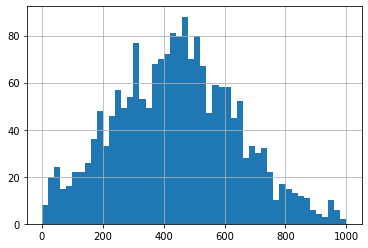

In [89]:
profit_by_user_month['total_length'].hist(bins=50, range=(1,1000))

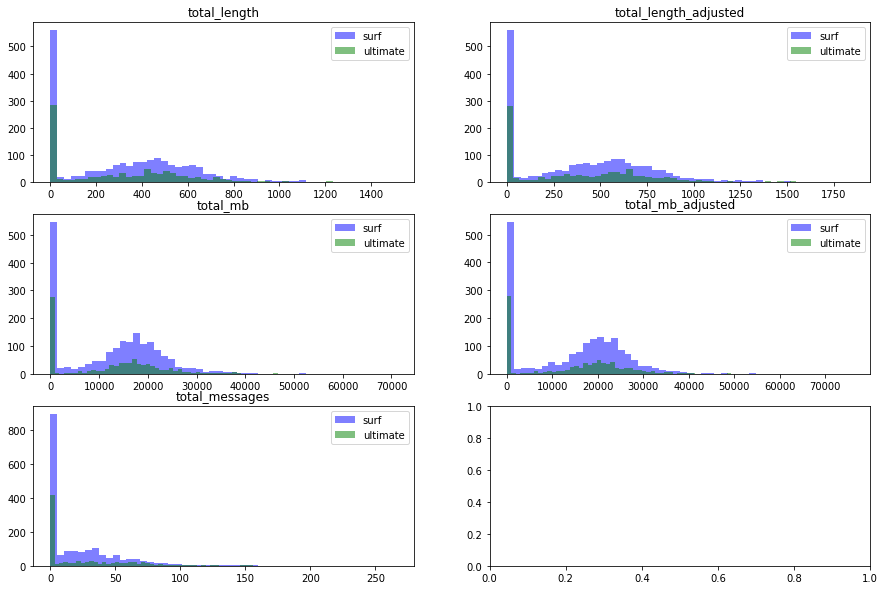

In [90]:
to_plot = ['total_length', 'total_length_adjusted'
           , 'total_mb', 'total_mb_adjusted', 'total_messages']
bins = [50, 50, 50, 50, 50]
colors = ['blue', 'green']
fig, axes = plt.subplots(3,2, figsize=(15,10))
for i, feature in enumerate(to_plot):
    for j, tariff in enumerate(tariff_dict.keys()):
        axes[i//2, i%2].hist(profit_by_user_month.query('tariff == @tariff')[feature]
                             , bins=bins[i], color=colors[j], alpha=0.5, histtype='bar', label=tariff)
        axes[i//2, i%2].legend()
    axes[i//2, i%2].set(title=feature)
plt.show()


Well obviously we have a problem with those no data months. Let's take a closer look

In [91]:
for i, feature in enumerate(to_plot):
    for j, tariff in enumerate(tariff_dict.keys()):
        share = (profit_by_user_month.query('tariff == @tariff')
                 [profit_by_user_month.query('tariff == @tariff')[feature] == 0].shape[0] 
                 /  profit_by_user_month.query('tariff == @tariff').shape[0])
        print('{}, {} empty month share: {:.3f}'.format(feature, tariff, share))

total_length, surf empty month share: 0.292
total_length, ultimate empty month share: 0.309
total_length_adjusted, surf empty month share: 0.292
total_length_adjusted, ultimate empty month share: 0.309
total_mb, surf empty month share: 0.284
total_mb, ultimate empty month share: 0.307
total_mb_adjusted, surf empty month share: 0.284
total_mb_adjusted, ultimate empty month share: 0.307
total_messages, surf empty month share: 0.440
total_messages, ultimate empty month share: 0.436


Well looks like emptyness of month does not depend on the tariff plan. So most likely it's missing data. 

In [92]:
profit_by_user_month.shape

(2782, 15)

In [93]:
all_missing = 'total_length == 0 and total_mb == 0 and total_messages == 0'
any_missing = 'total_length == 0 or total_mb == 0 or total_messages == 0'
print('Number of records without any information:', profit_by_user_month.query(all_missing).shape[0])
print('Number of records with some information missing:', profit_by_user_month.query(any_missing).shape[0])

Number of records without any information: 799
Number of records with some information missing: 1258


So 799 records have no data at all. Almost surely we just lack the data and it' not like users put their phone away every third or fourth month and not using it at all. We'll drop these records <br><br>

In [94]:
#Rename the dataframe to make the code more readable later on
data = profit_by_user_month.drop(profit_by_user_month.query(all_missing).index)
data.shape

(1983, 15)

Let's take a look at histograms now.

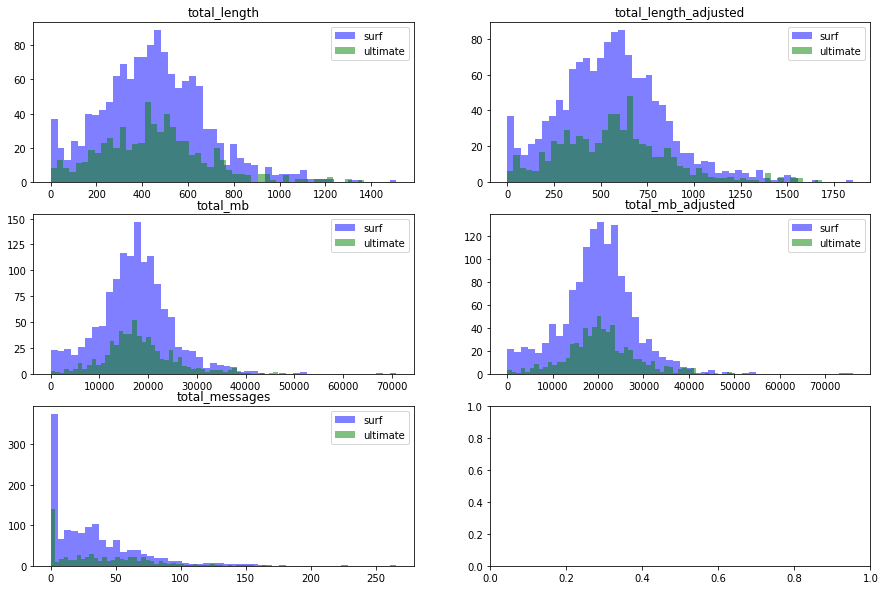

In [95]:
to_plot = ['total_length', 'total_length_adjusted'
           , 'total_mb', 'total_mb_adjusted', 'total_messages']
bins = [50, 50, 50, 50, 50]
colors = ['blue', 'green']
fig, axes = plt.subplots(3,2, figsize=(15,10))
for i, feature in enumerate(to_plot):
    for j, tariff in enumerate(tariff_dict.keys()):
        axes[i//2, i%2].hist(data.query('tariff == @tariff')[feature]
                             , bins=bins[i], color=colors[j], alpha=0.5, histtype='bar', label=tariff)
        axes[i//2, i%2].legend()
    axes[i//2, i%2].set(title=feature)
plt.show()

Well there are many zero-messages months but to be honest with all the messangers around people hardly ever use the messages. No wonder there are a lot of "not a single message" months. But it won't hurt anything to check it with the source.

Let's take a look at the density plots:

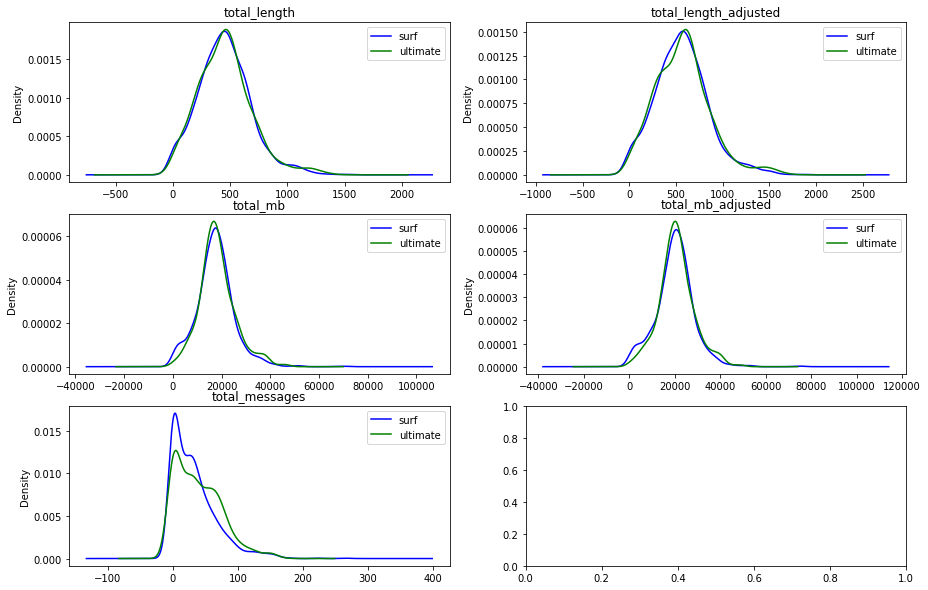

In [96]:
to_plot = ['total_length', 'total_length_adjusted'
           , 'total_mb', 'total_mb_adjusted', 'total_messages']
bins = [50, 50, 50, 50, 50]
colors = ['blue', 'green']
fig, axes = plt.subplots(3,2, figsize=(15,10))
for i, feature in enumerate(to_plot):
    for j, tariff in enumerate(tariff_dict.keys()):
        data.query('tariff == @tariff')[feature].plot.kde(ax=axes[i//2, i%2]
                                                          , color=colors[j], label=tariff)
        axes[i//2, i%2].legend()
    axes[i//2, i%2].set(title=feature)
plt.show()

We can see that user's behaviour almost the same for both tariff plans. 

The only significant difference is in the message plot - looks like ultimate clients tend to use messages more.

The plot of internet usage also shows some slight difference - the ultimate users distribution has havier right tail whereas the surf distribution has a bump on the left tail.

Almost no difference in calls distributions

Let's compute base statistics

In [97]:
data.query('tariff == "surf"')[to_plot].agg(['mean', 'std', 'var']).round(0)

,total_length,total_length_adjusted,total_mb,total_mb_adjusted,total_messages
mean,452.0,561.0,17485.0,20012.0,33.0
std,229.0,283.0,7735.0,8330.0,34.0
var,52407.0,79922.0,59824427.0,69394824.0,1178.0


In [98]:
data.query('tariff == "ultimate"')[to_plot].agg(['mean', 'std', 'var']).round(0)

,total_length,total_length_adjusted,total_mb,total_mb_adjusted,total_messages
mean,456.0,568.0,18360.0,20832.0,40.0
std,235.0,292.0,7407.0,7695.0,35.0
var,55144.0,85190.0,54870462.0,59208011.0,1252.0


## Test the hypothesis

Now let's move to the most interesting part - the profit.

In [99]:
data.columns

Index(['user_id', 'tariff', 'month', 'total_length', 'total_length_adjusted',
       'charged_calls', 'charged_adjusted_calls', 'total_mb',
       'total_mb_adjusted', 'charged_internet', 'charged_adjusted_internet',
       'total_messages', 'charged_message', 'charged', 'charged_adjusted'],
      dtype='object')

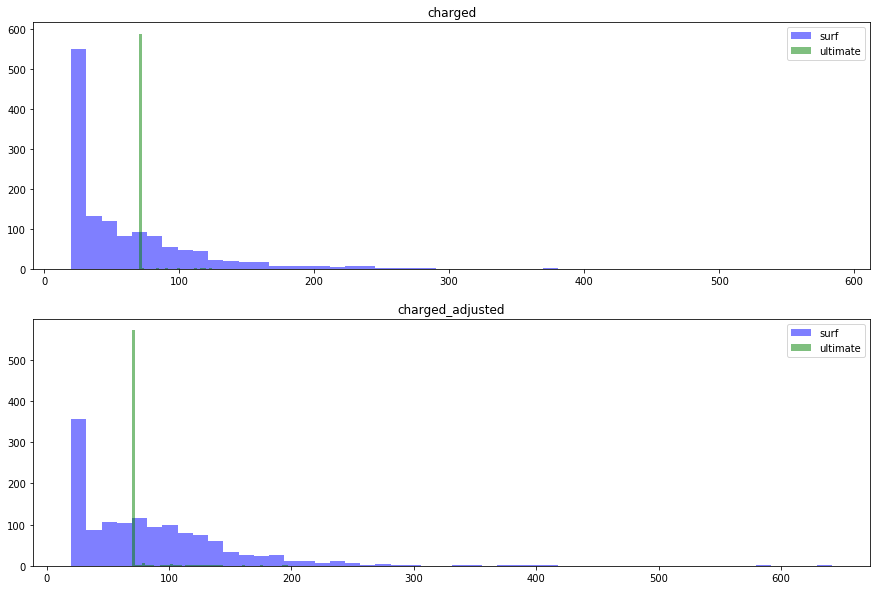

In [100]:
to_plot = ['charged', 'charged_adjusted']
bins = [50, 50]
colors = ['blue', 'green']
fig, axes = plt.subplots(2,1, figsize=(15,10))
for i, feature in enumerate(to_plot):
    for j, tariff in enumerate(tariff_dict.keys()):
        axes[i].hist(data.query('tariff == @tariff')[feature]
                             , bins=bins[i], color=colors[j], alpha=0.5, histtype='bar', label=tariff)
        axes[i].legend()
    axes[i].set(title=feature)
plt.show()

Nice! As we could suggest from the histograms we've seen before most of the users of ultimate tariff doesn't exceed the included limits and thus charged the monthly payment only

In [101]:
data.query('tariff == "surf"')[to_plot].agg(['mean', 'std', 'var']).round(0)

,charged,charged_adjusted
mean,62.0,84.0
std,56.0,64.0
var,3124.0,4049.0


In [102]:
data.query('tariff == "ultimate"')[to_plot].agg(['mean', 'std', 'var']).round(0)

,charged,charged_adjusted
mean,72.0,74.0
std,12.0,14.0
var,134.0,208.0


Now we can see how importent is the information about zero-time calls and zero-mb sessions - if our initial suggestion was wrong we could draw absolutly wrong conclusions. Need to check with the source.

#### Hypothesis: the average profit from the users of Ultimate and Surf calling plans is different

To check if some things are different we should set null-hypothesis that they are equal. Only in this case we have a possibility to claim after our test that they are different with some level of confidence. In other words:
we have two samples hypothesis to test:
H0 is the mean profit from the users of Ultimate and Surf calling plans is the same
H1 (alternative) - they are not.

In [103]:
#alpha = .01 
#results = st.ttest_ind(data_surf.sample(625, random_state=100)['charged'], data_ultimate['charged'])
#print('p-value: ', results.pvalue)

#if (results.pvalue < alpha):
#        print("We reject the null hypothesis")
#else:
#        print("We can't reject the null hypothesis")


In [105]:
data_surf = data.query('tariff == "surf"')
data_ultimate = data.query('tariff == "ultimate"')
data_surf.shape, data_ultimate.shape

((1358, 15), (625, 15))

In [106]:
alpha = .01 
results = st.ttest_ind(data_surf['charged'], data_ultimate['charged'], equal_var=False)
print('p-value: ', results.pvalue)

if (results.pvalue < alpha):
        print("We reject the null hypothesis")
else:
        print("We can't reject the null hypothesis")


p-value:  7.730760585630222e-12
We reject the null hypothesis


In [107]:
alpha = .01 
results = st.ttest_ind(data_surf['charged_adjusted']
                       , data_ultimate['charged_adjusted'], equal_var=False)
print('p-value: ', results.pvalue)

if (results.pvalue < alpha):
        print("We reject the null hypothesis")
else:
        print("We can't reject the null hypothesis")

p-value:  2.096666151178098e-08
We reject the null hypothesis


In both cases we confirm that the average profit from the users of Ultimate and Surf calling plans is different with at least 99% confidence (actually more then that). <br><br>
Two remarks.
1. The underlying distributions are far from normal so the reason we can use the ttest here is that 625 is really big sample size and for this N ttest actually becomes the z-test... 
2. What we actually confirmed here is that we can't actually claim anything at all untill we got the confirmation on those zero values. Because if we left them as 0 - we are confident that Ultimate is more profitable but if it is an error and we replace it with means - we are confident that Surf plan is more profitable. But in reality it's even worse: if there is an error then what kind of error? What if it's kind of specific and after restoration we'll get the test fail to reject the null hypothesis? <br> We could try and filter out all the months and users when there are the zero values in the calls and internet data sets, but this kind of manipulation with the data set also may lead us to wrong conclusions - we need to know origin of these zero-values anyway

<br><br>
We need to check the info with the source

### Hypothesis: the average profit from the users in NY-NJ area is different from that of the users from other regions.

As before:<br>
H0 - he average profit from the users in NY-NJ area is equal to that of the users from other regions<br>
H1 - they are not

In [108]:
users.head()

,user_id,first_name,last_name,age,city,reg_date,tariff,churn_date,full_months
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,2019-01-01,[]
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,2019-01-01,"[9, 10, 11, 12]"
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,2019-01-01,"[11, 12]"
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,2019-01-01,"[2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]"
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,2019-01-01,"[6, 7, 8, 9, 10, 11, 12]"


In [109]:
len(users['city'].unique())

73

In [110]:
users[users['city'].str.contains('NY-NJ')]['city'].unique()

array(['New York-Newark-Jersey City, NY-NJ-PA MSA'], dtype=object)

In [111]:
users['from NY-NJ'] = users['city'].str.contains('NY-NJ')
users[users['from NY-NJ']].shape

(80, 10)

In [112]:
data = data.merge(users[['user_id', 'from NY-NJ']], on='user_id', how='left')
data.head()

,user_id,tariff,month,total_length,total_length_adjusted,charged_calls,charged_adjusted_calls,total_mb,total_mb_adjusted,charged_internet,charged_adjusted_internet,total_messages,charged_message,charged,charged_adjusted,from NY-NJ
0,1001,surf,9,315.0,414.0,0.0,0.00,13333.0,18325.0,0.000000,28.955078,44.0,0.00,20.000000,48.955078,False
1,1001,surf,10,393.0,555.0,0.0,1.65,22356.0,25428.0,68.320312,98.320312,53.0,0.09,88.410313,120.060313,False
2,1001,surf,11,426.0,561.0,0.0,1.83,18524.0,19676.0,30.898438,42.148438,36.0,0.00,50.898438,63.978437,False
3,1001,surf,12,412.0,502.0,0.0,0.06,19398.0,22086.0,39.433594,65.683594,44.0,0.00,59.433594,85.743594,False
4,1002,surf,11,386.0,449.0,0.0,0.00,19364.0,22724.0,39.101562,71.914062,32.0,0.00,59.101562,91.914062,False


In [113]:
data_NY = data[data['from NY-NJ']][['tariff', 'charged']]
data_not_NY = data[~data['from NY-NJ']][['tariff', 'charged']]
data_NY.shape, data_not_NY.shape

((326, 2), (1657, 2))

In [114]:
alpha = .05 
results = st.ttest_ind(data_not_NY['charged'], data_NY['charged'], equal_var=True)
print('p-value: ', results.pvalue)

if (results.pvalue < alpha):
        print("We reject the null hypothesis")
else:
        print("We can't reject the null hypothesis")

p-value:  0.01990312023096392
We reject the null hypothesis


But we discovered that the average profit from the users of Ultimate and Surf calling plans is different thus we  actually need a stratified sampling here

In [115]:
n_surf = data_NY.query('tariff == "surf"').shape[0]
n_ult = data_NY.query('tariff == "ultimate"').shape[0]

In [118]:
n_surf, n_ult

(272, 54)

In [119]:
data_not_NY.query('tariff == "surf"').shape[0], data_not_NY.query('tariff == "ultimate"').shape[0]

(1086, 571)

In [122]:
n_ult = int(data_not_NY.query('tariff == "surf"').shape[0] 
            / data_NY.query('tariff == "surf"').shape[0]
            * data_NY.query('tariff == "ultimate"').shape[0])
n_surf = data_not_NY.query('tariff == "surf"').shape[0]
n_ult, n_surf

(215, 1086)

In [123]:
strat_sample = (pd
                .concat([data_not_NY.query('tariff == "surf"')
                          , data_not_NY.query('tariff == "ultimate"').sample(n_ult, random_state=100)]
                        , ignore_index=True)
                .sample(frac=1, random_state=100))
strat_sample.shape

(1301, 2)

In [127]:
alpha = .05 
results = st.ttest_ind(strat_sample['charged'], data_NY['charged'], equal_var=True)
print('p-value: ', results.pvalue)

if (results.pvalue < alpha):
        print("We reject the null hypothesis")
else:
        print("We can't reject the null hypothesis")

p-value:  0.1168554567061685
We can't reject the null hypothesis


We cannot claim that the average profit from the users in NY-NJ area is different from that of the users from other regions

## Overall conclusion

In this project we explored the data of the mobile operator. We were given the data of 500 users with two differend tariff plans. We preprocessed the data and tested some hypotheses. We descovered:
- the dataset has some significant flaws
    - the dataset missing the data for some full months for active users. Somtimes there is no data at all and sometimes we missing just part of the data. We were working with the assumption that if there are some data then the missing data actually stands for not using this option (like no messages at all). But considering that the dataset has months with absolutely no data we can't reject the possibility of error with partial data missing - need to verify our assumption with the data provider
    - the datasets of calls and internet sessions have a lot of zero time calls and zero size sessions. The description of the datasets has no mention as for origin of this zero values. In our exploration we showed that it is crucial for the analysis to know the meaning of it. We've got two completely different results of comparison of two tariff plans with respect of the way how we dealt with the zero value. If we consider them as actual zero-time calls/session (our base assumption) we may conclude the Ultimate plan is more profitable for the company. On the other hand if the zeroes stands for data-error and we are filling the data with mean values (and it could be completely wrong depends on the kind of error) we may conclude that the Surf plan is more profitable. Thus it's obligatory to clarify the meaning of these zero-values with the data source.
- any further conclusions are made on condition of clarifying of the flaws mentioned above
- we explored the users behavier for different tariff plans. We discovered that even though there are some minor difference in distributions of monthly internet traffic and message counts the most cllients have the same behavier regardless of tariff plan
- we confirmed with 99% confidence that the average profit from the users of Ultimate and Surf calling plans is different (under suggestions made)
- based on the data provided we failed to confirm  that the average profit from the users in NY-NJ area is different from that of the users from other regions with any reasonable confidence.